# SVD Basics

## Background

### Eigenvalues and Eigenvectors

**General**
* Describe the behaviour of a square matrix $A$ when it acts as a linear transformation.
* Eigenvector $\mathbf{v}$ - a non-zero vector such that when $A$ is applied to it, the result is a scalar multiple of $\mathbf{v}$.
$$
A \mathbf{v} = \lambda \mathbf{v}
$$
* $\lambda$ - eigenvalue corresponding to the eigenvector $\mathbf{v}$.
* $mathbf{v}$'s direction remains unchanged, only its magnitude is scaled
* Eigenvectors are linearly independent

**Geometric Interpretation**
* $\lambda > 1$ - stretches the vector.
* $0 < \lambda < 1$ - shrinks the vector.
* $\lambda = 0$ - collapses the vector to the origin.
* $\lambda < 0$ - reflects the vector across the origin and scales it.
* Analogy: a rubber sheet is stretched or compressed. Most points move to new locations, but some points (those along the axis) stay on the same line. They move closer or further from the origin, but their direction remains unchanged. These points are **eigenvectors**, and their scaling factors are **eigenvalues**.

### Diagonal Matrix

**General**
$$
D = \begin{pmatrix}
d_1 & 0 & 0 \\
0 & d_2 & 0 \\
0 & 0 & d_3
\end{pmatrix}
$$

* Determinant - product of diagonal elements $\det(D) = d_1 \cdot d_2 \cdot d_3$.
* Inverse - if all elements are non-zero, inverse is obtained by taking the reciprocal of each diagonal element
$$
D^{-1} = \begin{pmatrix}
\frac{1}{d_1} & 0 & 0 \\
0 & \frac{1}{d_2} & 0 \\
0 & 0 & \frac{1}{d_3}
\end{pmatrix}
$$
* Multiplciation
    * $AD$ - scales thr rows of $A$ by the diagonal elements of $D$.
    * $DA$ - scales the columns of $A$ by the diagonal elements of $D$.
* Transposition - same as the original matrix.
* Power - raising to a power is done element-wise. $D^k$ would have $d_1^k, d_2^k, d_3^k$ on the diagonal.

**Geometric Interpretation**
* Scales a vector $(x,y,z)$ by the diagonal elements.
* Scaling operations stretches or shirnks the vector along each axis independently.

### Orthogonal Matrix

**General**
* Square matrix $Q$ is orthogonal if the following holds:
$$
Q^T = Q^{-1}
$$
* Following properties hold for orthogonal matrices:
$$
Q^T Q = I \\
Q Q^T = I
$$

* Determinant
   * +1 or -1
   * $\det(Q) = 1$ - represents a rotation.
    * $\det(Q) = -1$ - represents a reflection.
* Example 1: Rotation matrix in 2D
$$
Q = \begin{pmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{pmatrix} \\

\det(Q) = \cos^2(\theta) + \sin^2(\theta) = 1
$$
* Example 2: Reflection matrix in 2D
$$
Q = \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix} \\
\det(Q) = 1 \cdot (-1) - 0 \cdot 0 = -1
$$

**Geometric Interpretation**
* Orthogonal matrix Q preserves the length of vectors and angles between them.
* As the Euclidean norm (length) is given as:
$$
||\mathbf{v}|| = \sqrt{v_1^2 + v_2^2 + \cdots + v_n^2}
$$
* Length is preserved
$$
||Q\mathbf{v}|| = ||\mathbf{v}||
$$
* Angle is also preserved
$$
(Q\mathbf{u}) (Q\mathbf{v}) = \mathbf{u} \mathbf{v}
$$
* Orthogonal matrices represent rigid transformations - rotations and reflections that do not stretch of distort the space.

## Singular Value Decomposition (SVD)

### SVD definition
* SVD - a matrix factorization technique that decomposes a $m \times n$ matrix $A$ into three matrices:
$$
A = U \Sigma V^T
$$
* Components of the transformation:
    * $U$ - $m \times m$ orthogonal matrix whose columns are the **left singular vectors** of $A$.
    * $\Sigma$ - $m \times n$ diagonal matrix with non-negative real numbers. There are the **singular values** of $A$ on the diagonal in descending order.
    * $V$ - $n \times n$ orthogonal matrix whose columns are the **right singular vectors** of $A$. V is transposed in the decomposition.

### Components of SVD

**Singular Values**
* Represent the "importance" or "magnitude" of each dimension in the transformation defined by $A$.
* Quantify how much $A$ stretches or compresses vectors along the directions defined by the singular vectors.

**Singular Vectors**
* Singular vectors define the directions in which A acts as the scaling transformation, with singular values specifying the scaling factors.
* Left singular vectors ($U$) - eigenvectors of $AA^T$. Form an orthonormal basis for the column space of $A$.
* Right singular vectors ($V$) - eigenvectors of $A^TA$. Form an orthonormal basis for the row space of $A$.

## Frobenius Norm
* Frobenius norm - a way to the total magnitude/energy of a matrix.
* Square every element, sum them up, and take the square root.
$$
||A||_F = \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n} |a_{ij}|^2} = \sqrt{\sigma_1^2+ \sigma_2^2 + \cdots + \sigma_r^2}
$$
* In SVD helps measure how well a low-rank approximation (so few singular values) captures the original matrix.
* $\Sigma $ is truncated to keep only the largest singular values, giving $A_k$ and minimizing the Frobenius norm of the error
$$
||A - A_k||_F
$$ 

## Computation of SVD

**Computational Complexity**
* $m \times n$ matrix $A$
* Where $m \geq n$
* SVD has complexity if of
$$
O(mn^2)
$$
* Computationally very expensive for large matrices.

**SVD Computation Mathematically**
$$
A = \begin{pmatrix}
4 & 0 \\
0 & 3
\end{pmatrix}
$$

1. Compute $A^TA$ and $AA^T$.
$$
A^TA = \begin{pmatrix}
16 & 0 \\
0 & 9
\end{pmatrix} \\
AA^T = \begin{pmatrix}
16 & 0 \\
0 & 9
\end{pmatrix}
$$
2. Find eigenvalues and eigenvectors of $A^TA$ and $AA^T$.
* Eigenvalues of $A^TA$: $\lambda_1 = 16$, $\lambda_2 = 9$.
* Eigenvectors of $A^TA$: $\mathbf{v_1} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$, $\mathbf{v_2} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$.
* Thus
$$
V = \begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
$$

* Eigenvalues of $AA^T$: $\lambda_1 = 16$, $\lambda_2 = 9$.
* Eigenvectors of $AA^T$: $\mathbf{u_1} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$, $\mathbf{u_2} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$.
* Thus
$$
U = \begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
$$
3. Form $\Sigma$ by having singular values on the diagonal. Singular values are the square roots of the eigenvalues.
$$
\sigma_i = \sqrt{\lambda_i}
$$
$$
\Sigma = \begin{pmatrix}
4 & 0 \\
0 & 3
\end{pmatrix}
$$
4. Confirm the SVD decomposition.
$$
U \Sigma V^T = \begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix} \begin{pmatrix}
4 & 0 \\
0 & 3
\end{pmatrix} \begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix} = \begin{pmatrix}
4 & 0 \\
0 & 3
\end{pmatrix} = A
$$
5. Compute the Frobenius norm.
$$
||A||_F = \sqrt{4^2 + 3^2} = \sqrt{25} = 5
$$

Matrix A:
 [[4 0 1]
 [0 3 0]
 [1 0 2]]
U:
 [[-0.92387953  0.          0.38268343]
 [ 0.         -1.          0.        ]
 [-0.38268343  0.         -0.92387953]]
S:
 [4.41421356 3.         1.58578644]
V^T:
 [[-0.92387953  0.         -0.38268343]
 [-0.         -1.          0.        ]
 [ 0.38268343  0.         -0.92387953]]
Reconstructed A:
 [[4. 0. 1.]
 [0. 3. 0.]
 [1. 0. 2.]]
Frobenius norm of A:
 5.5677643628300215
Frobenius norm from singular values:
 5.5677643628300215


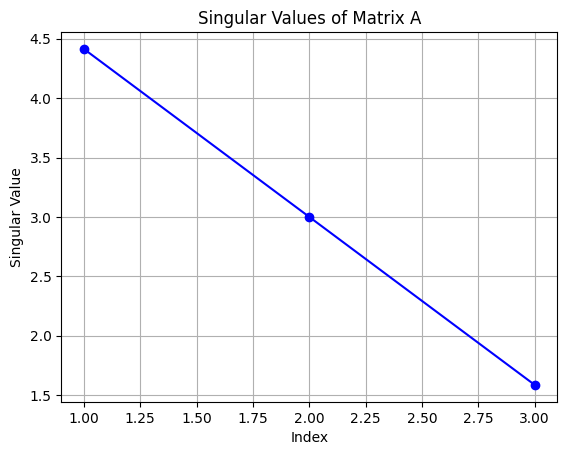

In [8]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[4, 0, 1], [0, 3, 0], [1, 0, 2]])
print("Matrix A:\n", A)

U, S, VT = np.linalg.svd(A)

# Results of the SVD
print("U:\n", U)
print("S:\n", S)
print("V^T:\n", VT)

# Reconstruction
A_reconstructed = U @ np.diag(S) @ VT
print("Reconstructed A:\n", A_reconstructed)

# Frobenius norm
frobenius_norm = np.linalg.norm(A, 'fro')
print("Frobenius norm of A:\n", frobenius_norm)

frobenius_norm_from_singular_values = np.sqrt(np.sum(S**2))
print("Frobenius norm from singular values:\n", frobenius_norm_from_singular_values)

# Plot
plt.figure()
plt.plot(range(1, len(S) + 1), S, 'bo-')
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.title("Singular Values of Matrix A")
plt.grid(True)
plt.show()
